<a href="https://colab.research.google.com/github/tingjhenjiang/Segmentor/blob/master/Tensorflow_Certification_Test_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
def std_nparray(arr):
    arr = (arr-arr.min())/(arr.max()-arr.min())
    return(arr)

#  Boston House Pricing

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(test_split=0.2, seed=113)
x_train = std_nparray(x_train)
x_test = std_nparray(x_test)
y_train = std_nparray(y_train)
y_test = std_nparray(y_test)

57344/57026 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(x_train)
print(y_train)

(404, 13)
[[1.73343179e-03 0.00000000e+00 1.14486639e-02 ... 2.95358650e-02
  5.58227848e-01 2.63291139e-02]
 [3.06188467e-05 1.16033755e-01 2.85513361e-03 ... 2.06751055e-02
  5.56090014e-01 4.37412096e-03]
 [6.88919831e-03 0.00000000e+00 2.54571027e-02 ... 2.84106892e-02
  5.28157525e-01 4.58509142e-03]
 ...
 [4.87482419e-05 4.92264416e-02 8.52320675e-03 ... 2.37693390e-02
  5.09493671e-01 1.10126582e-02]
 [3.02275668e-03 0.00000000e+00 2.75386779e-02 ... 2.06751055e-02
  3.68424754e-01 2.22081575e-02]
 [2.02390999e-05 8.43881857e-02 4.12095640e-03 ... 2.19409283e-02
  5.29817159e-01 6.16033755e-03]]
[0.22666667 0.82888889 1.         0.35777778 0.28222222 0.3
 0.14       0.23555556 0.23555556 0.20888889 0.15777778 0.28666667
 0.40222222 0.33111111 0.23777778 0.08444444 1.         0.38888889
 0.42444444 0.5        0.13111111 0.57333333 0.62       0.42222222
 0.3        0.18444444 0.39777778 0.66       0.25777778 0.27777778
 0.38444444 0.24666667 0.22       0.40222222 0.66444444 0.4444

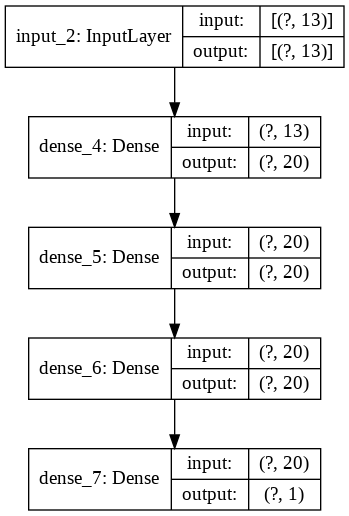

In [7]:
inputlayer = tf.keras.Input(
    shape=(x_train.shape[1],) #(None,)
    #, batch_size=None, name=None, dtype=None, sparse=False, tensor=None, ragged=False, **kwargs
)
nnlayer1 = tf.keras.layers.Dense(20, activation='relu')(inputlayer)
nnlayer2 = tf.keras.layers.Dense(20, activation='relu')(nnlayer1)
nnlayerfinal = tf.keras.layers.Dense(20, activation='relu')(nnlayer2)
dropoutlayer = tf.keras.layers.Dropout(
    rate=0.05
    #, noise_shape=None, seed=None, **kwargs
)(nnlayerfinal)
outputlayer = tf.keras.layers.Dense(1, activation='relu')(nnlayerfinal)
model = tf.keras.Model(inputs=inputlayer, outputs=outputlayer)
model.compile(optimizer = tf.keras.optimizers.RMSprop(),
              #optimizer=tf.keras.optimizers.SGD(),
              #optimizer=tf.keras.optimizers.Adam(0.001),
              #loss=tf.keras.losses.MeanSquaredError(),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=['accuracy', 'mae'],
              )
#model.summary()
tf.keras.utils.plot_model(
    model, show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [9]:
history = model.fit(x_train, y_train, batch_size=101, epochs=10, verbose=1, validation_data=(x_test, y_test))#

Epoch 1/10
4/4 [==============================] - 0s 17ms/step - loss: 0.1136 - accuracy: 0.0124 - mae: 0.1136 - val_loss: 0.1333 - val_accuracy: 0.0098 - val_mae: 0.1333
Epoch 2/10
4/4 [==============================] - 0s 7ms/step - loss: 0.1126 - accuracy: 0.0124 - mae: 0.1126 - val_loss: 0.1322 - val_accuracy: 0.0098 - val_mae: 0.1322
Epoch 3/10
4/4 [==============================] - 0s 8ms/step - loss: 0.1129 - accuracy: 0.0124 - mae: 0.1129 - val_loss: 0.1329 - val_accuracy: 0.0098 - val_mae: 0.1329
Epoch 4/10
4/4 [==============================] - 0s 12ms/step - loss: 0.1121 - accuracy: 0.0099 - mae: 0.1121 - val_loss: 0.1305 - val_accuracy: 0.0098 - val_mae: 0.1305
Epoch 5/10
4/4 [==============================] - 0s 8ms/step - loss: 0.1132 - accuracy: 0.0099 - mae: 0.1132 - val_loss: 0.1308 - val_accuracy: 0.0098 - val_mae: 0.1308
Epoch 6/10
4/4 [==============================] - 0s 8ms/step - loss: 0.1122 - accuracy: 0.0124 - mae: 0.1122 - val_loss: 0.1300 - val_accuracy: 0.0

# cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = std_nparray(x_train)
x_test = std_nparray(x_test)
#y_train = std_nparray(y_train)
#y_test = std_nparray(y_test)

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
print(x_train.shape)
print(x_train[0:3])
print(y_train[0:3])

(50000, 32, 32, 3)
[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 

In [4]:
x_train[0,0,].shape

(32, 3)

In [5]:
np.unique(y_train)
x_train.shape

(50000, 32, 32, 3)

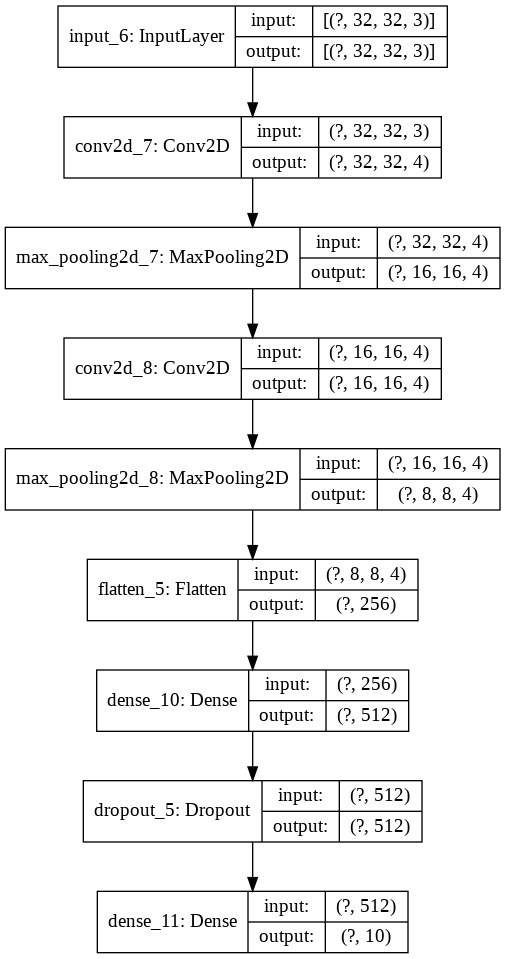

In [26]:
modelinputshape = x_train.shape[1:]
inputlayer = tf.keras.Input(shape=x_train.shape[1:])
conv1 = tf.keras.layers.Conv2D(4, 3, padding='same', activation="relu")(inputlayer)
maxpool1 = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=None, padding='same', data_format=None)(conv1)
conv2 = tf.keras.layers.Conv2D(4, 3, padding='same', activation="relu")(maxpool1)
maxpool2 = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=None, padding='same', data_format=None)(conv2)
flattenedlayer = tf.keras.layers.Flatten()(maxpool2)
fullyconnected_after_flatten = tf.keras.layers.Dense(512, activation='relu')(flattenedlayer)
afterpool_dropout = tf.keras.layers.Dropout(.15)(fullyconnected_after_flatten)
outputlayer = tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax')(afterpool_dropout)
model = tf.keras.Model(inputs=inputlayer, outputs=outputlayer)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), #沒有to_categorical時可以用sparse_categorical_crossentropy
              metrics=['accuracy'],
              )
#model.summary()
tf.keras.utils.plot_model(
    model, show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [27]:
history = model.fit(x_train, y_train, batch_size=550, epochs=25, verbose=1, validation_data=(x_test, y_test))

Epoch 1/25
91/91 [==============================] - 1s 12ms/step - loss: 1.9275 - accuracy: 0.3181 - val_loss: 1.6553 - val_accuracy: 0.4238
Epoch 2/25
91/91 [==============================] - 1s 8ms/step - loss: 1.5855 - accuracy: 0.4415 - val_loss: 1.5066 - val_accuracy: 0.4700
Epoch 3/25
91/91 [==============================] - 1s 7ms/step - loss: 1.4835 - accuracy: 0.4759 - val_loss: 1.4425 - val_accuracy: 0.4892
Epoch 4/25
91/91 [==============================] - 1s 7ms/step - loss: 1.4282 - accuracy: 0.4943 - val_loss: 1.4107 - val_accuracy: 0.5019
Epoch 5/25
91/91 [==============================] - 1s 7ms/step - loss: 1.3840 - accuracy: 0.5102 - val_loss: 1.3736 - val_accuracy: 0.5131
Epoch 6/25
91/91 [==============================] - 1s 8ms/step - loss: 1.3468 - accuracy: 0.5240 - val_loss: 1.3535 - val_accuracy: 0.5187
Epoch 7/25
91/91 [==============================] - 1s 7ms/step - loss: 1.3204 - accuracy: 0.5331 - val_loss: 1.3375 - val_accuracy: 0.5279
Epoch 8/25
91/91 [=

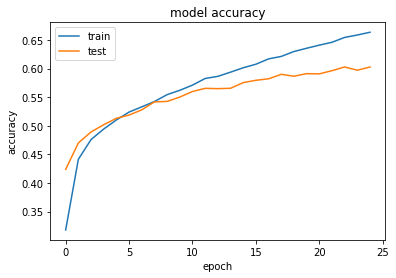

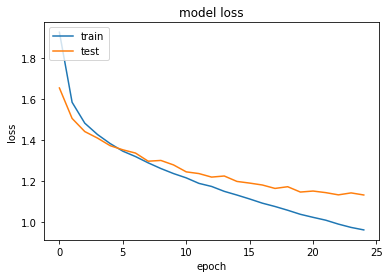

In [28]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
modelfilename = 'cifar10.h5'
model.save(modelfilename)
model = tf.keras.models.load_model(modelfilename)

# reuters

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.reuters.load_data(test_split=0.2)
print(x_train.shape)
print(x_train[0:3])
print(y_train[0:3])
print(np.unique(y_train))

2113536/2110848 [==============================] - 0s 0us/step
(8982,)
[list([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 30625, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187

In [11]:
maxlen = max([len(x) for x in x_train])
allcomments = [item for sublist in x_train for item in sublist] #functools.reduce(lambda sum, elem: set(sum).union(set(elem)), x_train, [])
allcomments = np.sort(np.unique(np.asarray(allcomments)))
num_words = allcomments[-1]+1
#num_words = len(allcomments)
print(maxlen)
print(num_words)

2376
30982


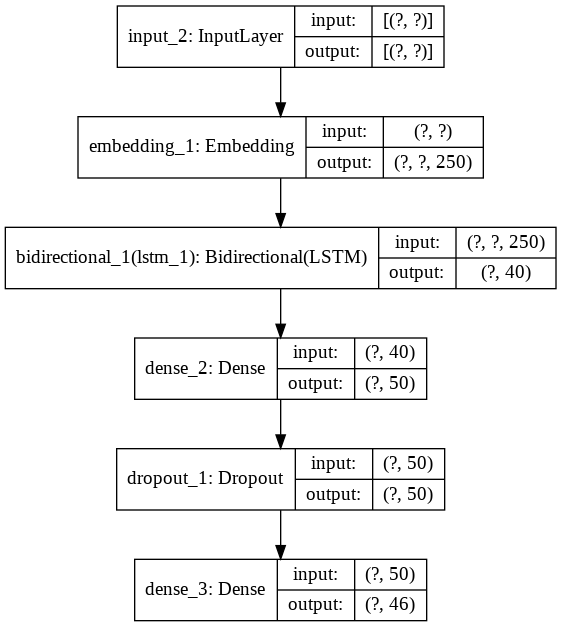

In [12]:
inputlayer = tf.keras.Input(shape=(None,))
embedlayer = tf.keras.layers.Embedding(input_dim=num_words, output_dim=250, mask_zero = True)(inputlayer)
bidirectional_lstm_layer = tf.keras.layers.Bidirectional(layer=tf.keras.layers.LSTM(units=20, activation='tanh'))(embedlayer)
denseafterlstmlayer = tf.keras.layers.Dense(50, activation='relu')(bidirectional_lstm_layer)
dropoutlayer = tf.keras.layers.Dropout(rate=0.2)(denseafterlstmlayer)
outputlayer = tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax')(dropoutlayer)
model = tf.keras.Model(inputs=inputlayer, outputs=outputlayer)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), #沒有to_categorical時可以用sparse_categorical_crossentropy
              metrics=['accuracy'],
              )
#model.summary()
tf.keras.utils.plot_model(
    model, show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [13]:
x_training = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen) #np.asarray([np.asarray(x for x in x_train)])
#x_training = [np.array(x) for x in x_train]
#x_training = [x for x in x_train]
#x_training = np.array(x_training)
#x_training = np.array(x_train)#.astype(np.int32)
#empty = np.ndarray(shape=(None,))
x_training = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen) #np.asarray([np.asarray(x for x in x_test)])
x_testing = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen) #np.asarray([np.asarray(x for x in x_test)])
print("x_train[0] is {}".format(x_train[0]))
print("x_training[0] is {}".format(x_training[0]))
print("type(x_train[0]) is {}".format(type(x_train[0])))
print("type(x_training[0]) is {}".format(type(x_training[0])))
print("type(x_train) is {}".format(type(x_train)))
print("type(x_training) is {}".format(type(x_training)))
try:
    print("x_training[0].dtype is {}".format(x_training[0].dtype))
    print("x_training.dtype is {}".format(x_training.dtype))
except:
    pass

x_train[0] is [1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
x_training[0] is [ 0  0  0 ... 15 17 12]
type(x_train[0]) is <class 'list'>
type(x_training[0]) is <class 'numpy.ndarray'>
type(x_train) is <class 'numpy.ndarray'>
type(x_training) is <class 'numpy.ndarray'>
x_training[0].dtype is int32
x_training.dtype is int32


In [14]:
history = model.fit(x_training, y_train, batch_size=384, epochs=6, verbose=1, validation_data=(x_testing, y_test))#single directional: 0.5552

Epoch 1/6
24/24 [==============================] - 256s 11s/step - loss: 3.5752 - accuracy: 0.3520 - val_loss: 2.8896 - val_accuracy: 0.3736
Epoch 2/6
24/24 [==============================] - 252s 11s/step - loss: 2.2763 - accuracy: 0.4920 - val_loss: 1.9373 - val_accuracy: 0.5378
Epoch 3/6
24/24 [==============================] - 249s 10s/step - loss: 1.8275 - accuracy: 0.5422 - val_loss: 1.7617 - val_accuracy: 0.5356
Epoch 4/6
24/24 [==============================] - 252s 10s/step - loss: 1.6343 - accuracy: 0.5567 - val_loss: 1.6529 - val_accuracy: 0.5579
Epoch 5/6
24/24 [==============================] - 255s 11s/step - loss: 1.4871 - accuracy: 0.6112 - val_loss: 1.5809 - val_accuracy: 0.6135
Epoch 6/6
24/24 [==============================] - 250s 10s/step - loss: 1.3455 - accuracy: 0.6682 - val_loss: 1.5197 - val_accuracy: 0.6309


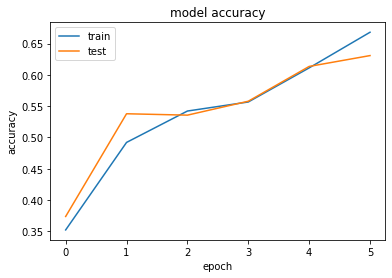

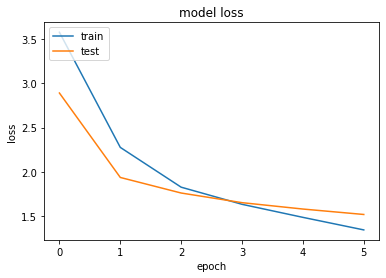

In [15]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Transfer Learning

In [5]:
!wget https://storage.googleapis.com/xlnet/released_models/cased_L-12_H-768_A-12.zip
# -d path_to_directory
!unzip cased_L-12_H-768_A-12.zip

--2020-10-04 03:43:55--  https://storage.googleapis.com/xlnet/released_models/cased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.20.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 433638019 (414M) [application/zip]
Saving to: ‘cased_L-12_H-768_A-12.zip’

cased_L-12_H-768_A- 100%[===================>] 413.55M   205MB/s    in 2.0s    

2020-10-04 03:43:57 (205 MB/s) - ‘cased_L-12_H-768_A-12.zip’ saved [433638019/433638019]

Archive:  cased_L-12_H-768_A-12.zip
   creating: xlnet_cased_L-12_H-768_A-12/
  inflating: xlnet_cased_L-12_H-768_A-12/xlnet_model.ckpt.index  
  inflating: xlnet_cased_L-12_H-768_A-12/xlnet_model.ckpt.data-00000-of-00001  
  inflating: xlnet_cased_L-12_H-768_A-12/spiece.model  
  inflating: xlnet_cased_L-12_H-768_A-12/xlnet_model.ckpt.meta  
  inflating: xlnet_cased_L-12_H-768_A-12/x